# A4 Introduction to Fully Connected Neural Networks 
# Author : Devisha Arunadevi Tiwari

4422102/4422102 [==============================] - 1s 0us/step


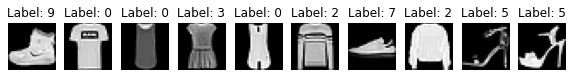

Epoch 1/10
1500/1500 - 8s - loss: 0.8119 - accuracy: 0.7287 - val_loss: 0.5699 - val_accuracy: 0.7987 - 8s/epoch - 5ms/step
Epoch 2/10
1500/1500 - 6s - loss: 0.5216 - accuracy: 0.8200 - val_loss: 0.4978 - val_accuracy: 0.8220 - 6s/epoch - 4ms/step
Epoch 3/10
1500/1500 - 6s - loss: 0.4703 - accuracy: 0.8374 - val_loss: 0.4541 - val_accuracy: 0.8416 - 6s/epoch - 4ms/step
Epoch 4/10
1500/1500 - 6s - loss: 0.4417 - accuracy: 0.8460 - val_loss: 0.4647 - val_accuracy: 0.8351 - 6s/epoch - 4ms/step
Epoch 5/10
1500/1500 - 6s - loss: 0.4192 - accuracy: 0.8535 - val_loss: 0.4250 - val_accuracy: 0.8494 - 6s/epoch - 4ms/step
Epoch 6/10
1500/1500 - 6s - loss: 0.4022 - accuracy: 0.8599 - val_loss: 0.4165 - val_accuracy: 0.8546 - 6s/epoch - 4ms/step
Epoch 7/10
1500/1500 - 6s - loss: 0.3873 - accuracy: 0.8635 - val_loss: 0.4314 - val_accuracy: 0.8512 - 6s/epoch - 4ms/step
Epoch 8/10
1500/1500 - 6s - loss: 0.3747 - accuracy: 0.8679 - val_loss: 0.3952 - val_accuracy: 0.8619 - 6s/epoch - 4ms/step
Epoch 9/

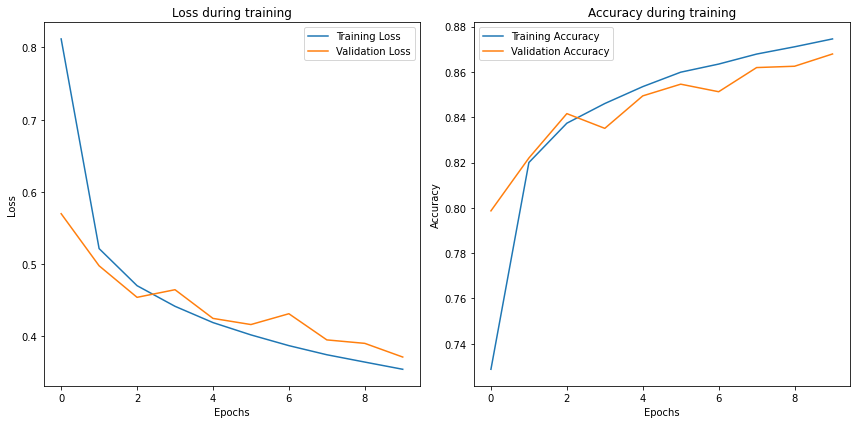

313/313 [==============================] - 1s 2ms/step
Predicted Labels: [9 2 1 1 6]
Actual Labels: [9 2 1 1 6]


In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

# Step 1: Data Visualization and Preprocessing

# Load the Fashion MNIST dataset (60,000 training samples and 10,000 test samples)
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Visualize the first 10 images in the training dataset
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Label: {y_train[i]}")
plt.show()

# Normalize the image pixel values to be between 0 and 1 by dividing by 255
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the data to flatten the images (28x28 to 784)
x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)

# Convert the labels into a one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 2: Model Architecture and Development

# Define the architecture of the Fully Connected Neural Network (FCNN)
model = models.Sequential([
    layers.InputLayer(input_shape=(28 * 28,)),  # Input layer (flattened image)
    layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    layers.Dense(64, activation='relu'),   # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(10, activation='softmax') # Output layer with 10 neurons (one for each class)
])

# Step 3: Model Compilation
# Compile the model using categorical cross-entropy as the loss function, 
# stochastic gradient descent (SGD) as the optimizer, and accuracy as the metric
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Model Training
# Train the model on the preprocessed data, and include a validation split to monitor performance
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_split=0.2,  # Split 20% of training data for validation
                    verbose=2)

# Step 5: Performance Evaluation

# Evaluate the model on both the training and test datasets
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 6: Visualization of Training Progress

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy during training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Step 7: Make Predictions (Optional)
# Use the trained model to make predictions on the test set
y_pred = model.predict(x_test)

# Show the first 5 predicted labels vs actual labels
predicted_labels = np.argmax(y_pred, axis=1)
actual_labels = np.argmax(y_test, axis=1)

print(f"Predicted Labels: {predicted_labels[:5]}")
print(f"Actual Labels: {actual_labels[:5]}")
